<a href="https://colab.research.google.com/github/MayorKing13/var_tipo_cambio/blob/main/Tipo_de_cambio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
tipo_de_cambio = pd.read_excel('https://www.bch.hn/estadisticos/GIE/LIBTipo%20de%20cambio/Precio%20Promedio%20Diario%20del%20D%C3%B3lar.xlsx')


In [22]:
#Miremos como está el dataset antes de hacer cualquier tratamiento
tipo_de_cambio

,Banco Central de Honduras,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Subgerencia de Estudios Económicos,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Precio Promedio del Dólar de los Estados Unido...,NaN,NaN,NaN,NaN
3,Serie Diaria 2000-2023,NaN,NaN,NaN,NaN
4,(Lempiras por US$1.00),NaN,NaN,NaN,NaN
...,...,...,...,...,...
6295,1/ Corresponde al Tipo de Cambio de Referencia...,NaN,NaN,NaN,NaN
6296,"2/ El tipo de cambio mensual, es el promedio s...",NaN,NaN,NaN,NaN
6297,3/ Promedio simple de los días transcurridos.,NaN,NaN,NaN,NaN
6298,Fecha de actualización: 31/10/2023,NaN,NaN,NaN,NaN


Se observan registros que no muestran datos, así que vamos a ver los primeros 15 registros

In [23]:
tipo_de_cambio.head(15)

,Banco Central de Honduras,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Subgerencia de Estudios Económicos,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Precio Promedio del Dólar de los Estados Unido...,NaN,NaN,NaN,NaN
3,Serie Diaria 2000-2023,NaN,NaN,NaN,NaN
4,(Lempiras por US$1.00),NaN,NaN,NaN,NaN
5,Fecha,Compra 1/,Venta,NaN,NaN
6,Enero 2/,14.536667,14.717143,NaN,NaN
7,2000-01-03 00:00:00,14.5,14.68,NaN,NaN
8,2000-01-04 00:00:00,14.5,14.69,NaN,NaN
9,2000-01-05 00:00:00,14.51,14.69,NaN,NaN


Podemos observar que los datos estan con dos columnas extras sin datos, además existe una fila por cada mes que sirve de promedio del mismo y hay registros extras al inicio y al final, procederemos a hacer la limpieza de los mismos para tener un dataset acorde.

##Limpieza de Datos


In [24]:
#Comenzaremos creando una copia de los datos
tipo_de_cambio_limpio = tipo_de_cambio.copy()

#A partir de aquí haremos la limpieza de los mismos, eliminando algunas filas
#que no tienen información solo dejando el tipo de cambio, de igual forma las
#columnas que no traen información y algunas filas que sirven de promedio mensual
tipo_de_cambio_limpio.columns = tipo_de_cambio_limpio.iloc[5]
tipo_de_cambio_limpio.drop(tipo_de_cambio_limpio.index[0:6], inplace=True)
tipo_de_cambio_limpio.drop(tipo_de_cambio_limpio.columns[[3, 4]], axis='columns', inplace=True)
tipo_de_cambio_limpio.columns = ['Fecha', 'Compra', 'Venta']
tipo_de_cambio_limpio.columns.name = ''
tipo_de_cambio_limpio.dropna(subset = ['Venta'], inplace = True)

#Ahora procederemos a cambiar los tipos de cada columna
tipo_de_cambio_limpio['Fecha'] = pd.to_datetime(tipo_de_cambio_limpio['Fecha'], errors='coerce')
tipo_de_cambio_limpio.dropna(subset = ['Fecha'], inplace = True)
tipo_de_cambio_limpio = tipo_de_cambio_limpio.astype({'Compra': 'float64', 'Venta': 'float64'})
#tipo_de_cambio_limpio.index = range(tipo_de_cambio_limpio.shape[0])
tipo_de_cambio_limpio.index = tipo_de_cambio_limpio['Fecha']
tipo_de_cambio_limpio.drop(tipo_de_cambio_limpio.columns[0], axis='columns', inplace=True)
tipo_de_cambio_limpio.head(10)
#tipo_de_cambio_limpio['Compra']
#tipo_de_cambio_limpio.plot(tipo_de_cambio_limpio['Compra'])

,Compra,Venta
Fecha,,
2000-01-03,14.50,14.68
2000-01-04,14.50,14.69
2000-01-05,14.51,14.69
2000-01-06,14.51,14.69
2000-01-07,14.51,14.70
2000-01-10,14.51,14.69
2000-01-11,14.51,14.69
2000-01-12,14.53,14.71
2000-01-13,14.54,14.71


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6002 entries, 2000-01-03 to 2023-11-01
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Compra               6002 non-null   float64
 1   Venta                6002 non-null   float64
 2   Rentabilidad_Compra  6001 non-null   float64
 3   Rentabilidad_Venta   6001 non-null   float64
dtypes: float64(4)
memory usage: 234.5 KB


array([[<Axes: title={'center': 'Rentabilidad_Compra'}>]], dtype=object)

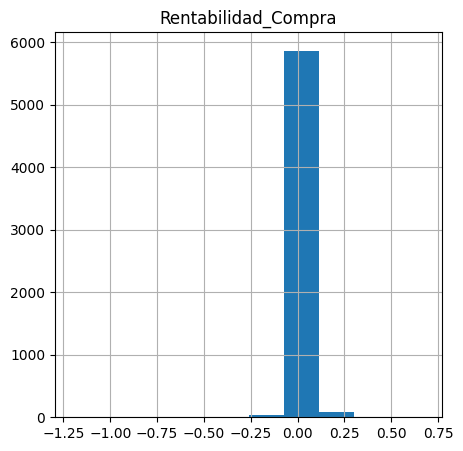

In [41]:
#Veremos la información que tiene nuestro Dataset ahora que ya está limpio
tipo_de_cambio_limpio.info()
#Calcularemos la rentabilidad para diaria mediante logaritmos cada tipo de cambio para ver su comportamiento como distribución
tipo_de_cambio_limpio['Rentabilidad_Compra'] = np.log(tipo_de_cambio_limpio['Compra'] / tipo_de_cambio_limpio['Compra'].shift(1))*100
tipo_de_cambio_limpio['Rentabilidad_Venta'] = np.log(tipo_de_cambio_limpio['Venta'] / tipo_de_cambio_limpio['Venta'].shift(1))*100
tipo_de_cambio_limpio.describe()
#Veremos el histograma de los datos ya limpios
tipo_de_cambio_limpio.hist('Rentabilidad_Compra', figsize = (5,5))

#Visualización de Datos

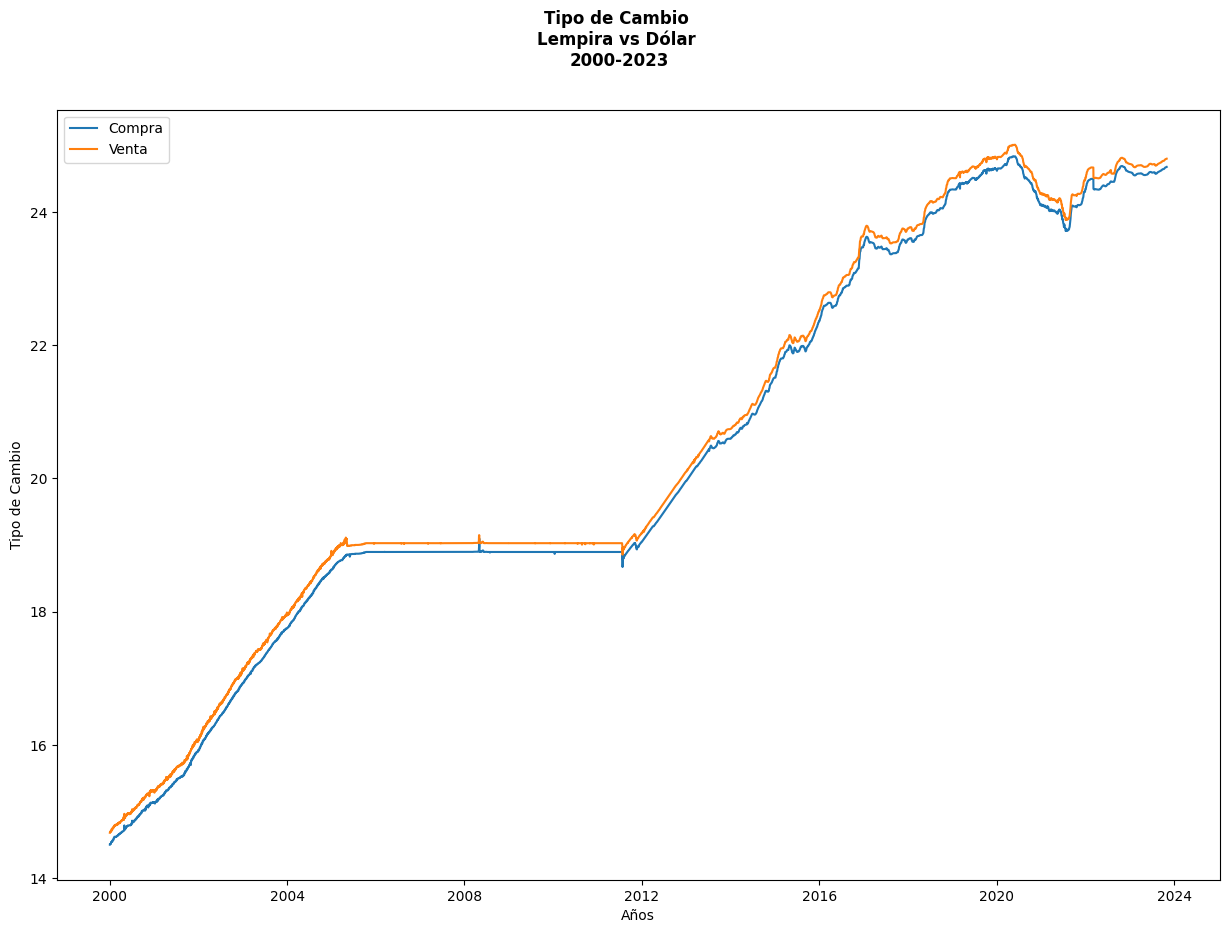

In [26]:
#Crearemos un gráfico de linea de los valores de compra y venta a través del tiempo
plt.rc('figure', figsize = (15,10))
plt.suptitle('Tipo de Cambio \nLempira vs Dólar \n2000-2023', ha='center', fontweight ="bold")
plt.plot(tipo_de_cambio_limpio.index, tipo_de_cambio_limpio['Compra'], label='Compra',)
plt.plot(tipo_de_cambio_limpio.index, tipo_de_cambio_limpio['Venta'], label='Venta')
plt.xlabel('Años')
plt.ylabel('Tipo de Cambio')
plt.legend(loc = 'upper left')
clear_output()
plt.show()

#Pruebas de Normalidad
Primero filtraremos los datos por fecha desde el 2018 a la fecha actual

In [27]:
seleccion = tipo_de_cambio_limpio.index > "2017-12-31"
tipo_de_cambio_filtrado = tipo_de_cambio_limpio.loc[seleccion]
tipo_de_cambio_filtrado

,Compra,Venta,Rentabilidad_Compra,Rentabilidad_Venta
Fecha,,,,
2018-01-02,23.5879,23.7530,0.000000,0.000000
2018-01-03,23.5886,23.7537,0.002968,0.002947
2018-01-04,23.5892,23.7543,0.002544,0.002526
2018-01-05,23.5898,23.7549,0.002544,0.002526
2018-01-08,23.5926,23.7577,0.011869,0.011786
...,...,...,...,...
2023-10-26,24.6719,24.7953,0.002432,0.002420
2023-10-27,24.6726,24.7960,0.002837,0.002823
2023-10-30,24.6739,24.7973,0.005269,0.005243


## Normalidad (de la rentabilidad de Compra) de manera gráfica
Primero veremos el histograma de la distribución, así como una "prueba de Normalidad" gráfica para estimar si corresponde a la distribución Normal

Ahora crearemos el histograma con los datos de la rentabilidad compra

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 4.700e+01,
        1.335e+03, 7.900e+01, 4.000e+00, 1.000e+00]),
 array([-0.59945148, -0.50764657, -0.41584166, -0.32403675, -0.23223184,
        -0.14042693, -0.04862202,  0.04318289,  0.1349878 ,  0.22679271,
         0.31859762]),
 <BarContainer object of 10 artists>)

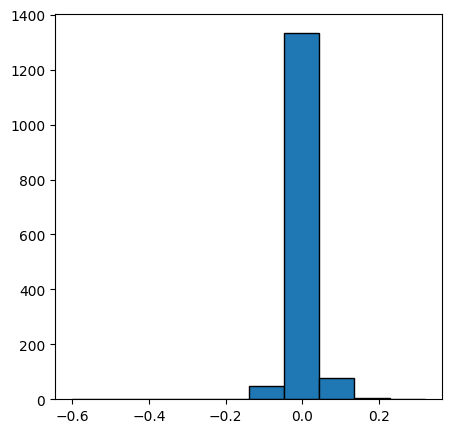

In [28]:
plt.rc('figure', figsize = (5,5))
plt.hist(tipo_de_cambio_filtrado['Rentabilidad_Compra'], edgecolor = 'black', linewidth=1)

Ahora crearemos el gráfico Quantil-Quantile para corroborar normalidad de los datos

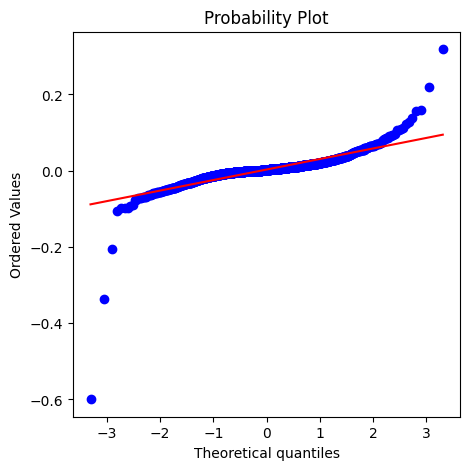

In [29]:
import pylab
import scipy.stats as stats

plt.rc('figure', figsize = (5,5))
stats.probplot(tipo_de_cambio_filtrado['Rentabilidad_Compra'], dist='norm', plot=pylab)
pylab.show()

De manera gráfica podemos intuir que la distribución no es normal, ya que tiene varios puntos fuera de la recta y la distribución tampoco simula la campana de Gauss, vamos a confirmar nuestras ideas mediante la prueba de normalidad de Shapiro.

##Prueba de Shapiro
En la prueba de Shapiro si se tiene que p_value>0.05 significa que la distribución es normal, de lo contrario no.

In [30]:
from scipy.stats import shapiro
estadistico, p_value = shapiro(tipo_de_cambio_filtrado['Rentabilidad_Compra'])
print('Estadístico= %.3f, p_value= %.3f' % (estadistico, p_value))

Estadístico= 0.688, p_value= 0.000


Haremos lo mismo con los datos de rentabilidad de Venta

## Normalidad (de la rentabilidad de Venta) de manera gráfica
Primero veremos el histograma de la distribución, así como una "prueba de Normalidad" gráfica para estimar si corresponde a la distribución Normal

Ahora crearemos el histograma con los datos de la rentabilidad venta

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 4.700e+01,
        1.334e+03, 7.900e+01, 4.000e+00, 1.000e+00]),
 array([-0.59975742, -0.50789905, -0.41604068, -0.32418231, -0.23232394,
        -0.14046557, -0.0486072 ,  0.04325116,  0.13510953,  0.2269679 ,
         0.31882627]),
 <BarContainer object of 10 artists>)

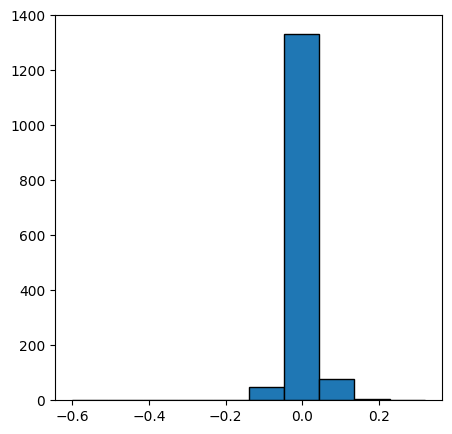

In [31]:
plt.hist(tipo_de_cambio_filtrado['Rentabilidad_Venta'], edgecolor = 'black', linewidth=1)

Ahora crearemos el gráfico Quantil-Quantile para corroborar normalidad de los datos

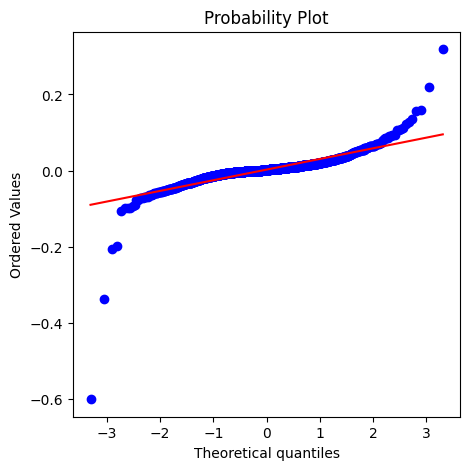

In [32]:
import pylab
import scipy.stats as stats

plt.rc('figure', figsize = (5,5))
stats.probplot(tipo_de_cambio_filtrado['Rentabilidad_Venta'], dist='norm', plot=pylab)
pylab.show()

Por las formas gráficas, no parece que la distribución sea normal, ya que tiene varios puntos fuera de la recta y la distribución tampoco simula la campana de Gauss, vamos a confirmar nuestras ideas mediante la prueba de normalidad de Shapiro.

##Prueba de Shapiro
En el test de Shapiro-Wilks si se tiene que p_value>0.05 significa que la distribución puede ser normal, de lo contrario (p_value<0.05) significa con seguridad de que no es una distribución normal.

In [33]:
from scipy.stats import shapiro
estadistico, p_value = shapiro(tipo_de_cambio_filtrado['Rentabilidad_Venta'])
print('Estadístico= %.3f, p_value= %.3f' % (estadistico, p_value))

Estadístico= 0.687, p_value= 0.000


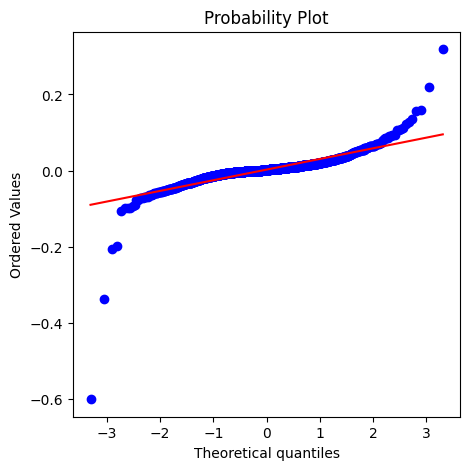

In [34]:
import pylab
import scipy.stats as stats

plt.rc('figure', figsize = (5,5))
stats.probplot(tipo_de_cambio_filtrado['Rentabilidad_Venta'], dist='norm', plot=pylab)
pylab.show()

In [35]:
seleccion = (tipo_de_cambio_limpio.index >= '2023-07-01')
tipo_de_cambio_limpio[seleccion]

,Compra,Venta,Rentabilidad_Compra,Rentabilidad_Venta
Fecha,,,,
2023-07-03,24.5918,24.7148,-0.005693,-0.005664
2023-07-04,24.5909,24.7139,-0.003660,-0.003642
2023-07-05,24.5899,24.7128,-0.004067,-0.004451
2023-07-06,24.5901,24.7131,0.000813,0.001214
2023-07-07,24.5904,24.7134,0.001220,0.001214
...,...,...,...,...
2023-10-26,24.6719,24.7953,0.002432,0.002420
2023-10-27,24.6726,24.7960,0.002837,0.002823
2023-10-30,24.6739,24.7973,0.005269,0.005243
